# Import the data and libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('cars.csv')
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
7271,Maruti,80000,Petrol,Third Owner,235000
768,Maruti,120000,Diesel,Second Owner,420000
7667,Maruti,37659,Diesel,First Owner,700000
1088,Toyota,25538,Petrol,First Owner,625000
4788,Mercedes-Benz,18000,Petrol,First Owner,2550000


In [25]:
df.columns

Index(['brand', 'km_driven', 'fuel', 'owner', 'selling_price'], dtype='object')

<Axes: ylabel='owner'>

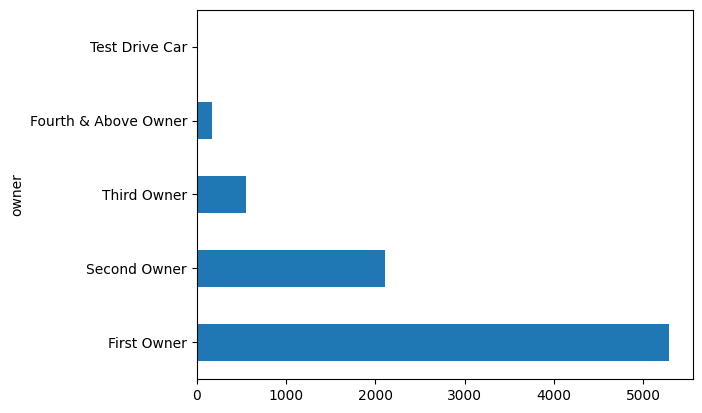

In [26]:
df['owner'].value_counts().plot(kind='barh')

In [27]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [28]:
df.columns

Index(['brand', 'km_driven', 'fuel', 'owner', 'selling_price'], dtype='object')

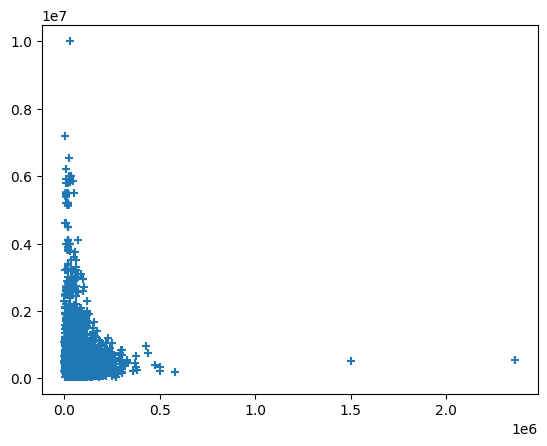

In [29]:
plt.scatter(x=df['km_driven'],
            y=df['selling_price'],
            marker='+',)

<Axes: xlabel='owner'>

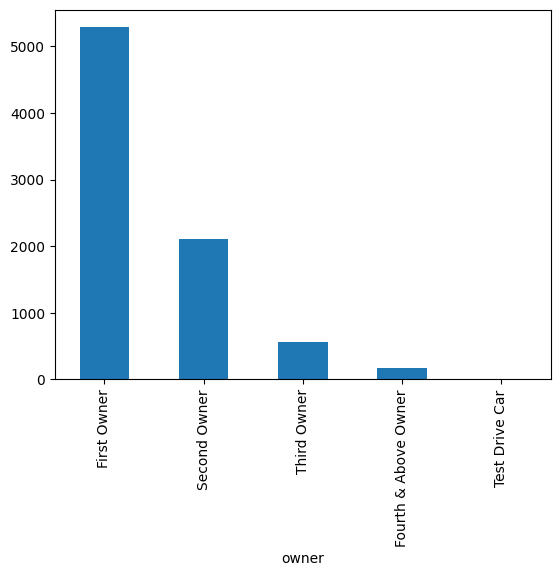

In [34]:
df['owner'].value_counts().plot(kind='bar')

# 1. One Hot Encoding using pandas
- Not use during ml times due to not compatible 

In [30]:
pd.get_dummies(df, columns=['fuel', 'owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


In [ ]:
# drop the first columns for remove the multicolinearity 
# If you check now no column named fuel_CNG
# This is called k minus 1 OneHotEncoding 
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True)


,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


# 2. OneHotEncoding using sklearn

### train test split

In [36]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.iloc[:, 0:4]
y = df.iloc[:, -1]
X.columns

Index(['brand', 'km_driven', 'fuel', 'owner'], dtype='object')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [44]:
X_train.sample(4)

,brand,km_driven,fuel,owner
2273,Toyota,84050,Petrol,First Owner
3796,Maruti,120000,LPG,Third Owner
5315,Mahindra,157138,Diesel,Third Owner
5975,Toyota,80000,Diesel,Second Owner


### one hot encoding 

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
ohe = OneHotEncoder(drop='first',sparse_output=False, dtype=np.int32)
ohe

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [74]:
X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']])
X_train_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], shape=(6502, 7), dtype=int32)

In [75]:
X_test_new = ohe.fit_transform(X_test[['fuel', 'owner']])
X_test_new

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], shape=(1626, 7), dtype=int32)

In [76]:
X_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], shape=(6502, 2), dtype=object)

In [86]:
df1 = np.hstack((X_train[['brand','km_driven']].values,X_train_new))
df1

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], shape=(6502, 9), dtype=object)

# 3. OneHotEncoding with Top Categories 

<Axes: ylabel='brand'>

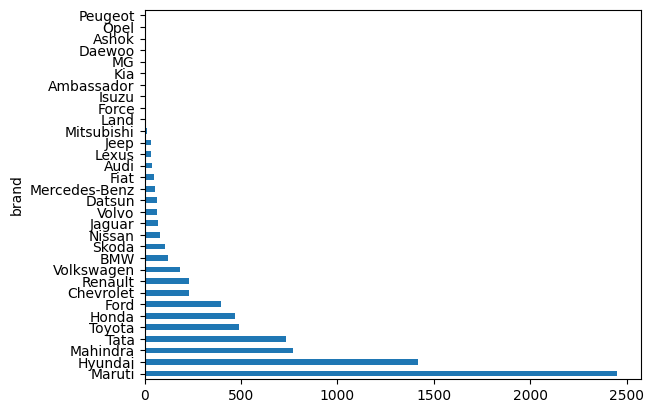

In [89]:
brand_count = df['brand'].value_counts()
brand_count.plot(kind='barh')

In [90]:
df['brand'].nunique()
threshold = 100

In [94]:
max_brand_replace = brand_count[brand_count <= threshold].index
max_brand_replace

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [95]:
pd.get_dummies(df['brand'].replace(max_brand_replace, 'Uncommon')).sample(12)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Uncommon,Volkswagen
8002,False,False,False,False,False,False,False,True,False,False,False,False,False
2445,False,False,False,False,True,False,False,False,False,False,False,False,False
6237,False,True,False,False,False,False,False,False,False,False,False,False,False
6377,False,False,False,False,True,False,False,False,False,False,False,False,False
5778,False,False,False,True,False,False,False,False,False,False,False,False,False
1883,False,False,False,True,False,False,False,False,False,False,False,False,False
1186,False,False,False,False,False,True,False,False,False,False,False,False,False
3899,False,False,False,False,True,False,False,False,False,False,False,False,False
4990,False,False,False,False,False,False,True,False,False,False,False,False,False
6646,False,False,False,False,False,False,True,False,False,False,False,False,False
